In [1]:
#TEST

In [1]:
%load_ext autoreload
%load_ext line_profiler
%autoreload 2

import numpy as np
import pandas as pd
from mpl_toolkits import mplot3d
import matplotlib
import matplotlib.pyplot as plt
import scipy.optimize as optimize
import Estimate
import figure 
from EconModel import cpptools
import pickle

from LimitedCommitmentModel import LimitedCommitmentModelClass

# plot style
linestyles = ['-','--','-.',':',':']
markers = ['o','s','D','*','P']
linewidth = 2
font_size = 17
font = {'size':font_size}
matplotlib.rc('font', **font)


plt.rcParams.update({'figure.max_open_warning': 0,'text.usetex': False})
path = 'output/'

SAVE = False

# c++ settings

do_compile = True
threads = 20
T = 20


In [2]:
name = 'model_NC'
model_name = "model_NC"
do_distr_yerror = "none"
do_yerror = 0
name_error = f'{do_distr_yerror}{do_yerror}std_Yerror'
#N = 16000 #MODEL_LC 
#N = 4000 #model NC
N = 3000
#name_error = "uni2std_Yerror"

specs = {}
#specs.update({f'test2':{'latexname':'limited', 'par':{ 'T':T, 'num_K': 5, 'num_A': 10 ,  'do_HK': False, 'threads':threads,'bargaining':0}}})


#specs.update({f'test2':{'latexname':'limited', 'par':{ 'T':T, 'do_HK': False, 'simN': N,  'threads':threads,'bargaining':1}}})

#specs.update({f'model_LC_highsigmaHK':{'latexname':'limited', 'par':{ 'T':T, 'do_HK': False, 'simN': N,  'threads':threads,'bargaining':1}}})
#specs.update({f'model_LC':{'latexname':'limited', 'par':{ 'T':T, 'do_HK': False, 'simN': N,  'threads':threads,'bargaining':1}}})specs.update({f'model_NC':{'latexname':'limited', 'par':{ 'T':T, 'do_HK': False, 'simN': N,  'threads':threads,'bargaining':2}}})
#specs.update({f'model_FC':{'latexname':'limited', 'par':{ 'T':T,  'do_HK': False, 'simN': N,  'threads':threads,'bargaining':0}}})

# solve different models
models = {}
for m,(name,spec) in enumerate(specs.items()):
    
    # setup model
    model = LimitedCommitmentModelClass(name=name,par=spec['par'])
    model.spec = spec

    compile_now = True if do_compile & (m==0) else False
    model.link_to_cpp(force_compile=compile_now)
    

# setup model
#model = LimitedCommitmentModelClass(name=name)    
#model.link_to_cpp(force_compile=True)


#load par and sol
pickle_file = f'output/{name}_sol.pickle'

with open(pickle_file, 'rb') as f:
    model.sol = pickle.load(f)

pickle_file = f'output/{name}_par.pickle'

with open(pickle_file, 'rb') as f:
    model.par = pickle.load(f)
    model.par.simN = N

In [4]:
#model.par.sigma_K = 1.0 # men jeg har løst det med det forkerte.... 
#model.par.sigma_love =  0.1 

data = Estimate.create_data(model,start_p = 2, end_p = model.par.T-2, yerror = do_distr_yerror, scale_st = do_yerror )
data = Estimate.create_variable(data, model.par)
#data = Estimate.aux_est(data,model.par)

data2 = data

#data2 = data2[data2['delta_log_barganing']< 0.5]
#data2 = data2[data2['delta_log_barganing']> -0.5]
#data2 = data2[data2['delta_log_barganing']!= 0]
print(data[['idx', 't','barganing','hours_w','hours_m','wealth']])

_, wald_FC_w , wald_NC_w,  _,_,_ = Estimate.main_est(data2,gender= "w", do_estimate_wage = "est_omega", print_reg = True, shadow_value_simple=4, do_control_love = True, part_earning_simple =3, control_cons = 3, wealth_love = 1, do_true_barg = True)
   

c:\Users\czk481\project\LimitedCommitmentTest-1\Estimate.py:242: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[delta_log] = data[log_name]-data[log_name_l]
c:\Users\czk481\project\LimitedCommitmentTest-1\Estimate.py:243: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[delta_log_l] = data[log_name_l]-data[log_name_l2]
c:\Users\czk481\project\LimitedCommitmentTest-1\Estimate.py:244: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performan

        idx   t  barganing   hours_w   hours_m    wealth
0         1   6   0.500000  0.965357  0.979997  2.160856
1         1   7   0.498308  0.898062  0.910352  2.736662
2         1   8   0.525702  0.996013  0.953321  3.406737
3         1   9   0.500000  0.860059  0.845667  3.491055
4         1  10   0.500000  0.866943  0.816235  3.481637
...     ...  ..        ...       ...       ...       ...
16026  2999  14   0.500000  0.961729  0.877552  2.440260
16027  2999  15   0.500000  0.896188  0.906933  2.518384
16028  3000   6   0.665250  0.691331  0.999023  0.512989
16029  3000   7   0.659475  0.654991  0.990966  0.374187
16030  3000   8   0.823938  0.975850  0.950321  1.123977

[16031 rows x 6 columns]


c:\Users\czk481\project\LimitedCommitmentTest-1\Estimate.py:587: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Wealth_and_Love['delta_log_love'] = data_regress[['delta_log_Love']]
c:\Users\czk481\project\LimitedCommitmentTest-1\Estimate.py:588: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Wealth_and_Love['delta_log_love_l'] = data_regress[['delta_log_Love_l']]
c:\Users\czk481\project\LimitedCommitmentTest-1\Estimate.py:589: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

                            OLS Regression Results                            
Dep. Variable:                    y_w   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     377.5
Date:                Sat, 01 Jun 2024   Prob (F-statistic):               0.00
Time:                        10:46:53   Log-Likelihood:                 23065.
No. Observations:                8467   AIC:                        -4.471e+04
Df Residuals:                    7757   BIC:                        -3.971e+04
Df Model:                         709                                         
Covariance Type:              cluster                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [6]:
#SUMMARIZE!! TORSDAG!!  N = 5000, FC: 5066 NC: 19,000 , LC: 21,000
data2 = Estimate.create_data(model,start_p = 2, end_p = model.par.T-2, yerror = do_distr_yerror, scale_st = do_yerror )
data2 = Estimate.create_variable(data2, model.par)
data2['BMI_w']=data2['BMI_w']-1
data2['BMI_m']=data2['BMI_m']-1
summary = data2[['hours_w','hours_m','cons','wage_w','wage_m','earnings_w','earnings_m','wealth','BMI_w','BMI_m','barganing']].describe()
summary_by_T = data2[['hours_w','hours_m','cons','wage_w','wage_m','earnings_w','earnings_m','wealth','BMI_w','BMI_m','barganing','t']].groupby('t').mean()
summary_by_T['div_share'] = 1-data2[['hours_w','t']].groupby('t').count()/N

print(summary)
print(summary_by_T)

summary.to_excel(f'summary_statistics_{name}.xlsx')
summary_by_T.to_excel(f'summary_statistics_byT_{name}.xlsx')

#print(summary_by_count)

c:\Users\czk481\Anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\czk481\Anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\czk481\Anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\czk481\Anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\czk481\Anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\czk481\Anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in l

            hours_w       hours_m          cons        wage_w        wage_m  \
count  16285.000000  16285.000000  16285.000000  16285.000000  16285.000000   
mean       0.870537      0.867477      1.484831      1.543183      1.546021   
std        0.141674      0.141906      0.160043      0.310373      0.312572   
min        0.336336      0.282498      0.794404      1.010050      1.010050   
25%        0.781196      0.773018      1.434917      1.320087      1.317757   
50%        0.923053      0.916103      1.519507      1.511442      1.509915   
75%        0.995553      0.995015      1.577946      1.728094      1.734111   
max        1.000000      1.000000      1.923518      2.745601      2.745601   

         earnings_w    earnings_m        wealth         BMI_w         BMI_m  \
count  16285.000000  16285.000000  16285.000000  16285.000000  16285.000000   
mean       1.368441      1.366828      1.595044      0.184771      0.203193   
std        0.427279      0.431004      0.981731    

C:\Users\czk481\AppData\Local\Temp\2\ipykernel_11448\41027778.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data2['rel_dif_hours_w']=data2['delta_hours_w']/data2['hours_w_l']
C:\Users\czk481\AppData\Local\Temp\2\ipykernel_11448\41027778.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data2['hours_w_limit100'] = (data2['hours_w'] == 1)
C:\Users\czk481\AppData\Local\Temp\2\ipykernel_11448\41027778.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times,

       hours_w_limit97   hours_w  hours_m_limit  barganing
0                    1  0.983850              1   0.361538
1                    1  1.000000              0   0.361538
2                    0  0.936202              0   0.361538
3                    1  1.000000              0   0.361538
4                    0  0.941312              0   0.361538
...                ...       ...            ...        ...
16280                0  0.844554              0   0.417670
16281                0  0.890115              0   0.503122
16282                0  0.699537              0   0.503122
16283                0  0.745055              0   0.503122
16284                0  0.716291              0   0.503122

[16285 rows x 4 columns]
       rel_dif_hours_w  delta_hours_w     hours_w_l  hours_w_limit100  \
count     1.628500e+04   1.628500e+04  16285.000000      16285.000000   
mean      1.515208e-02  -4.920295e-03      0.875457          0.087995   
std       2.154249e-01   1.565505e-01      0.13

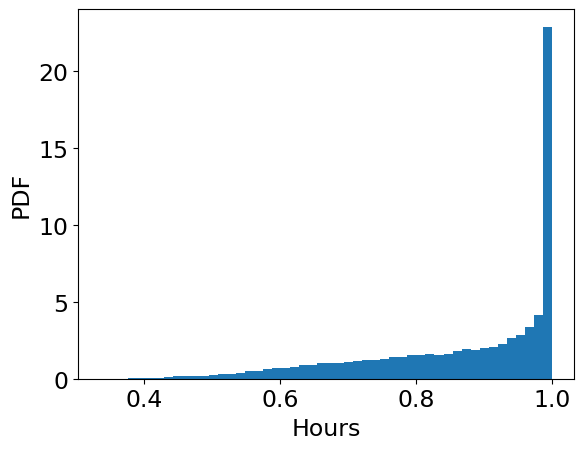

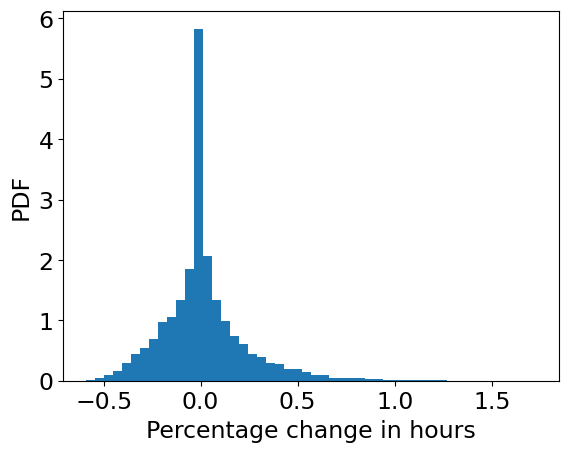

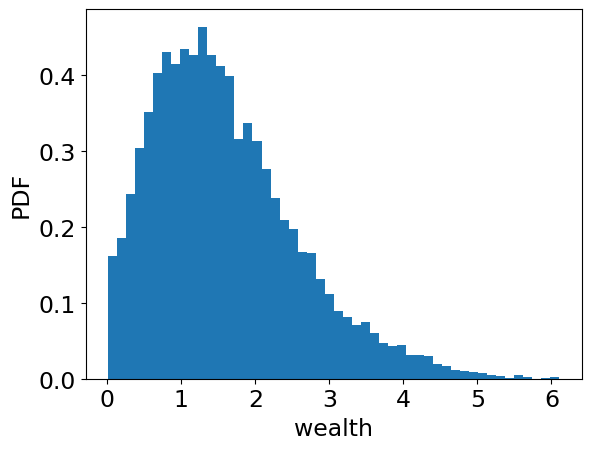

In [7]:
#kig på ændring i hours

gender = "w"

data2['rel_dif_hours_w']=data2['delta_hours_w']/data2['hours_w_l']

#kig på andel af par hvor en arbejder fuldtid


#stor en adnel er ved 1 

data2['hours_w_limit100'] = (data2['hours_w'] == 1)
data2['hours_w_limit100'] = data2['hours_w_limit100'].replace({True: 1, False: 0})
data2['hours_w_limit97'] = (data2['hours_w'] > 0.97)
data2['hours_w_limit97'] = data2['hours_w_limit97'].replace({True: 1, False: 0})

data2['hours_w_limit90'] = (data2['hours_w'] > 0.90)
data2['hours_w_limit90'] = data2['hours_w_limit90'].replace({True: 1, False: 0})

data2['hours_m_limit'] = (data2['hours_m'] > 0.97)
data2['hours_m_limit'] = data2['hours_m_limit'].replace({True: 1, False: 0})


print(data2[['hours_w_limit97','hours_w','hours_m_limit','barganing']])



summary = data2[['rel_dif_hours_w','delta_hours_w','hours_w_l', 'hours_w_limit100', 'hours_w_limit97', 'hours_w_limit90']].describe([.01,.1,.25,.5,.75,.9,.99])
print(summary)
#antag små ændringer er + - 10%

plt.hist(data2['hours_w'], bins = 50, density = True)
plt.xlabel('Hours')
plt.ylabel('PDF')
plt.savefig(f'output/hours_plot{model_name}_{gender}.png')
plt.show()

data3 = data2
data3=data3.drop(data3[(data3['hours_w_l']>0.9999) | (data3['hours_m_l']>0.9999) | (data3['hours_w']>0.9999) | (data3['hours_m']>0.9999)].index)

plt.hist(data2['rel_dif_hours_w'], bins = 50, density = True)
plt.xlabel('Percentage change in hours')
plt.ylabel('PDF')

plt.savefig(f'output/change_in_hours_plot{model_name}_{gender}.png')
#plt.hist(data3['rel_dif_hours_w'], bins = 50)
plt.show()



plt.hist(data2['wealth'], bins = 50, density = True)
plt.xlabel('wealth')
plt.ylabel('PDF')
plt.show()


C:\Users\czk481\AppData\Local\Temp\2\ipykernel_11448\1142855362.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data2['rel_dif_barg']=data2['delta_barganing']/data2['barganing_l']
C:\Users\czk481\AppData\Local\Temp\2\ipykernel_11448\1142855362.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data2['delta_bargaining0'] = (data2['delta_barganing'] == 0)


       delta_bargaining0  delta_barganing   barganing_l  rel_dif_barg
count       16285.000000     16285.000000  16285.000000  16285.000000
mean            0.834019        -0.000628      0.498902      0.003880
std             0.372075         0.037793      0.118452      0.086716
min             0.000000        -0.509660      0.096541     -0.840744
1%              0.000000        -0.150274      0.234339     -0.249388
10%             0.000000         0.000000      0.353970      0.000000
25%             1.000000         0.000000      0.406733      0.000000
50%             1.000000         0.000000      0.498480      0.000000
75%             1.000000         0.000000      0.586562      0.000000
90%             1.000000         0.000000      0.649100      0.000000
99%             1.000000         0.137159      0.783573      0.367956
max             1.000000         0.462141      0.937510      1.719891


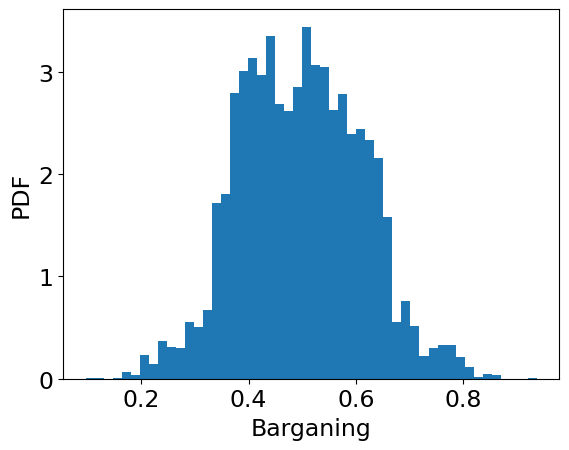

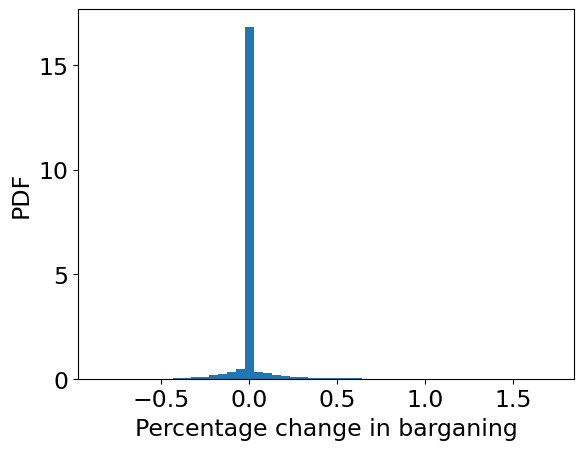

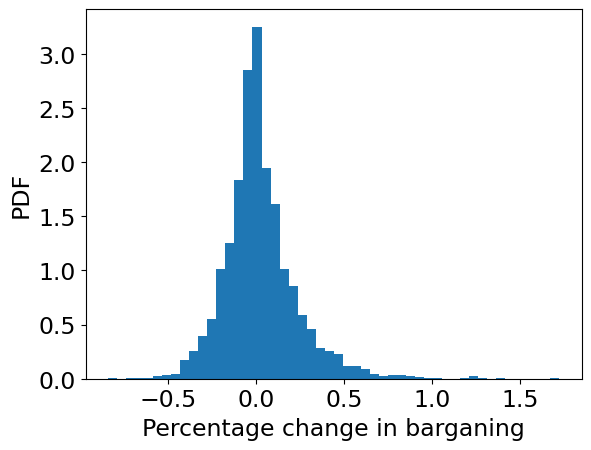

In [8]:
#bargaining
#kig på ændring i hours

gender = "w"

data2['rel_dif_barg']=data2['delta_barganing']/data2['barganing_l']

#kig på andel af par hvor en arbejder fuldtid


#stor en adnel er ved 1 



data2['delta_bargaining0'] = (data2['delta_barganing'] == 0)
data2['delta_bargaining0'] = data2['delta_bargaining0'].replace({True: 1, False: 0})
summary = data2[['delta_bargaining0','delta_barganing','barganing_l','rel_dif_barg']].describe([.01,.1,.25,.5,.75,.9,.99])
print(summary)
#antag små ændringer er + - 10%

plt.hist(data2['barganing'], bins = 50, density = True)
plt.xlabel('Barganing')
plt.ylabel('PDF')
plt.savefig(f'output/barganing_plot{model_name}_{gender}.png')
plt.show()

data3 = data2
#data3=data3.drop(data3[data3['barganing']== 0.5].index)

plt.hist(data2['rel_dif_barg'], bins = 50, density = True)
#plt.hist(data3['rel_dif_barg'], bins = 50, density = True)
plt.xlabel('Percentage change in barganing')
plt.ylabel('PDF')

plt.savefig(f'output/change_in_barg_plot{model_name}_{gender}.png')
#plt.hist(data3['rel_dif_hours_w'], bins = 50)
plt.show()



data3 = data2
data3=data3.drop(data3[data3['rel_dif_barg']== 0.0].index)

plt.hist(data3['rel_dif_barg'], bins = 50, density = True)
#plt.hist(data3['rel_dif_barg'], bins = 50, density = True)
plt.xlabel('Percentage change in barganing')
plt.ylabel('PDF')

plt.savefig(f'output/change_in_barg_plot{model_name}_{gender}_no0.png')
#plt.hist(data3['rel_dif_hours_w'], bins = 50)
plt.show()

